<a href="https://colab.research.google.com/github/sukhmanib93/Unsupervised-Learning/blob/main/AllLife_Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1.1"></a>
<h3 style="background-color:blue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Warngling</h1>

<a id="1.1"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Background</h1>

## AllLife Credit Card Customer Segmentation


**Background :**

*AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.*


**Objective :**

*To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank :**



**Key Questions :**

   *How many different segments of customers are there?*

   *How are these segments different from each other?*
    
   *What are your recommendations to the bank on how to better market to and service these customers?*
    
    
**Data Dictionary :**

   *Customer key - Identifier for the customer*

   *Average Credit Limit - Average credit limit across all the credit cards*
    
   *Total credit cards - Total number of credit cards*

   *Total visits bank - Total number of bank visits*

   *Total visits online - total number of online visits*

   *Total calls made - Total number of calls made by the customer*


<a id="1.1"></a>
<h3 style="background-color:yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Loading Libraries and Data Loading</h1>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.decomposition import PCA
sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Library to suppress the warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

data = pd.read_excel('CreditCardCustomerData.xlsx')
#Copying the data set
data1 = data.copy()
# Shape of the data 
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string
data.head(5)

Saving CreditCardCustomerData.xlsx to CreditCardCustomerData (1).xlsx
There are 660 rows and 7 columns.


Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

<a id="2"></a>
<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Missing values, duplicate values and Info of the data</h3>

In [5]:
print('Missing Values in the data set \n \n', data.isnull().sum()) # missing values

Missing Values in the data set 
 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [6]:
print('Duplicate values in the data set \n \n', data.duplicated().value_counts())

Duplicate values in the data set 
 
 False    660
dtype: int64


In [7]:
#Let us check if there are any duplicate values in the Customer Key column as it is supposed to be a unique column for each  customer
data[data['Customer Key'].duplicated()]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
332    333         47437             17000                   7   
398    399         96929             67000                   6   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0

*There are 5 duplicate customer key*

In [8]:
#Let us look at the the records for each duplicated customer
data[data['Customer Key'] == 47437]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
4        5         47437            100000                   6   
332    333         47437             17000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
4                    0                   12                 3  
332                  3                    1                 0

In [9]:
data[data['Customer Key'] == 96929]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
391    392         96929             13000                   4   
398    399         96929             67000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  
391                  5                    0                 0  
398                  2                    2                 2

In [10]:
data[data['Customer Key'] == 37252]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
48      49         37252              6000                   4   
432    433         37252             59000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  
48                   0                    2                 8  
432                  2                    1                 2

In [11]:
data[data['Customer Key'] == 50706]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
411    412         50706             44000                   4   
541    542         50706             60000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
411                  5                    0                 2  
541                  5                    2                 2

In [12]:
data[data['Customer Key'] == 97935]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
104    105         97935             17000                   2   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
104                  1                    2                10  
632                  1                    7                 0

*The entries for the duplicated customer key don't match. 

In [13]:
print('Information of the data \n \n', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
Information of the data 
 
 None


*There are no missing and duplicate values in the data set*

*All of the attributes are of the type integer*

*We have 660 rows and 7 columns*

<a id="2"></a>
<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Non Standard missing values</h3>


In [14]:
from collections import Counter

for col in data.columns:
    print(f'Column -- {col}')
    print(f'=========================')
    error_rows = []
    for row in data[col]:    
        try:
            float(row)
        except:
            error_rows.append(row)        
    print(f'{Counter(error_rows)}')

Column -- Sl_No
Counter()
Column -- Customer Key
Counter()
Column -- Avg_Credit_Limit
Counter()
Column -- Total_Credit_Cards
Counter()
Column -- Total_visits_bank
Counter()
Column -- Total_visits_online
Counter()
Column -- Total_calls_made
Counter()


*There are no non standard missing values in the data set*

<a id="2"></a>
<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Descriptive Statistics</h3>

In [15]:
#Will drop Sl_No and Customer Key as it does not hold any statistical significance
data.drop(['Sl_No'], axis = 1, inplace = True)

In [16]:
data.describe().T

count          mean           std      min       25%  \
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%      75%       max  
Customer Key         53874.5  77202.5   99843.0  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

**Observations :-**
    

`Average Credit Limit`:

    - 75% of the customers have atmost Rs.48000 as their average credit limit. 
    
    - Difference between the 3rd quartile and the maximum value is very high.
    
    - This attribute seems to be right skewed. 
        
`Total number of Credit cards`:
    
    - The total number of credit cards has a bandwith 1 to 10. 
    
    - 75% of the customers have 6 credit cards in total. 
    
    - This attribute seems to have a symmetric distribution.
    
`Total number of bank visits` :

    - The range of visits is between 0 and 5. 
    
    - 75% of the customers have visited the bank atmost 4 times.
    
    - This attribute seems to have a symmetric distribution.
    
`Total number of online visits`:

    - Customer seems to visit the bank online more than being physically present at the bank. The range lies between 0 and 15. 
    
    - 75% of the customers have vistied the bank online atmost 4 time. 
    
    - This attribute seems to be right skewed as there is a huge difference between the maximum value and the 3rd quartile
    
`Total number of calls made`:

    - The range of calls made to the bank lies between 0 and 10.
    
    - 75% of the customrs have called the bank atmost 5 times.

## Hypothesis for Customer Segmentation :- CONTACT METHOD 


*There would be three clusters for contact method, where customers would stick to their preferred method for interacting with their bank (online, in person, and through the phone). Below we can see a 3D rotating scatter plot which shows my hypothesis was correct.*

<a id="2"></a>
<h1 style="background-color:blue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


<a id="2"></a>
<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Uni-variate Analysis</h3>


*Will delete Customer Key for further analysis as it is a unique key*

In [17]:
data.drop(['Customer Key'], axis =1, inplace = True)

In [18]:
#definig the font size of the title and x,y labels globally
title_dict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16
        }

lab_dict = {'family': 'serif',
              'color': 'black',
              'size': 14
              }

####  Plotting Average Credit Limit

In [19]:
plt.figure(figsize=[20,15])
title_string = 'Distribution of Average Credit Limit'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.4) #Defining the grid space

#Histogram

ax0 = plt.subplot(grid[0, 0])
sns.distplot(x = data['Avg_Credit_Limit'])
ax0.set_xlabel(' Average Credit Limit', fontdict=lab_dict)
plt.title(' Average Credit Limit Histogram', fontdict = title_dict )

#boxplot

ax1 = plt.subplot(grid[0, 1])
sns.boxplot(x = 'Avg_Credit_Limit', data = data)
ax1.set_xlabel(' Average Credit Limit', fontdict=lab_dict)
plt.title(' Average Credit Limit Box plot', fontdict = title_dict )


plt.show();


*It is evident from the plots that this attribute is right skewed and have outliers as well*

*50% of the customers have their average credit limit between Rs. 10,000 and Rs. 48,000*

#### Plotting Total Number of Credit Cards

In [20]:
plt.figure(figsize=[20,15])
title_string = 'Distribution of Total Number of Credit Cards'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.4) #Defining the grid space

#Histogram

ax0 = plt.subplot(grid[0, 0])
sns.distplot(x = data['Total_Credit_Cards'])
ax0.set_xlabel(' Total Number of Credit Cards', fontdict=lab_dict)
plt.title('Total Number of Credit Cards Histogram', fontdict = title_dict )

#boxplot

ax1 = plt.subplot(grid[0, 1])
sns.boxplot(x = 'Total_Credit_Cards', data = data)
ax1.set_xlabel('Total Number of Credit Cards', fontdict=lab_dict)
plt.title('Total Number of Credit Cards Box plot', fontdict = title_dict )


plt.show();


*This attribute seems to have a symmetric distribution with no outliers*

#### Plotting Total number of bank visits

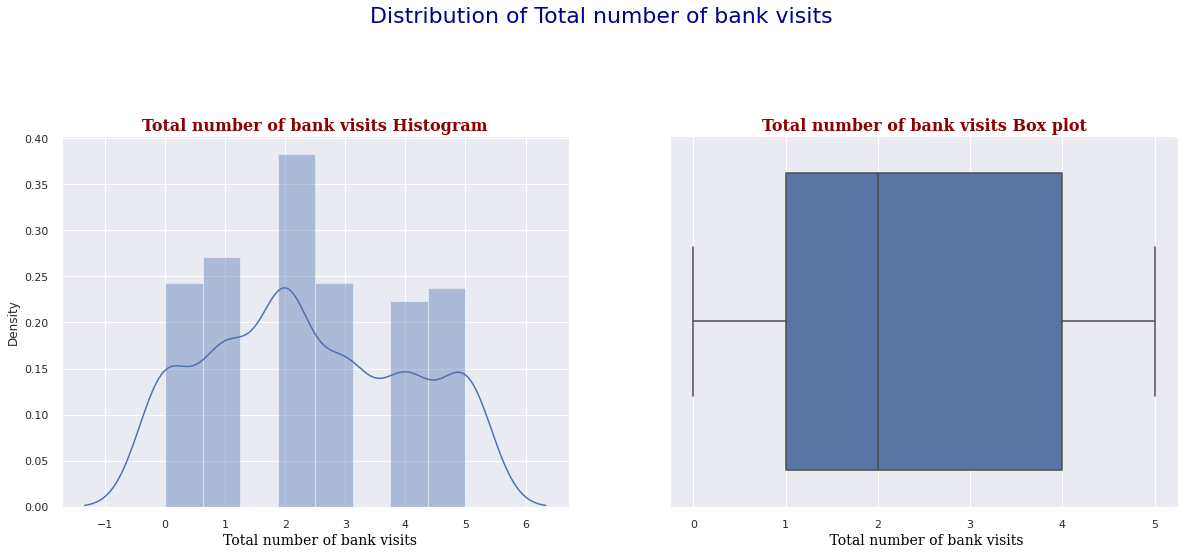

In [21]:

plt.figure(figsize=[20,15])
title_string = 'Distribution of Total number of bank visits'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2) #Defining the grid space

#Histogram

ax0 = plt.subplot(grid[0, 0])
sns.distplot(x = data['Total_visits_bank'])
ax0.set_xlabel('  Total number of bank visits', fontdict=lab_dict)
plt.title('Total number of bank visits Histogram', fontdict = title_dict )

#boxplot

ax1 = plt.subplot(grid[0, 1])
sns.boxplot(x = 'Total_visits_bank', data = data)
ax1.set_xlabel(' Total number of bank visits', fontdict=lab_dict)
plt.title('Total number of bank visits Box plot', fontdict = title_dict )


plt.show();

*The data is symmetrically distributed. 50 - 75% of the customers have the total number of credit cards between 2 and 4*

#### Plotting Total number of online visits

In [22]:

plt.figure(figsize=[20,15])
title_string = 'Distribution of Total number of online visits'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2) #Defining the grid spaconilnesvisitsam

ax0 = plt.subplot(grid[0, 0])
sns.distplot(x = data['Total_visits_online'])
ax0.set_xlabel('  Total number of online visits', fontdict=lab_dict)
plt.title(' Total number of online visits Histogram', fontdict = title_dict )

#boxplot

ax1 = plt.subplot(grid[0, 1])
sns.boxplot(x = 'Total_visits_online', data = data)
ax1.set_xlabel(' Total number of online visits', fontdict=lab_dict)
plt.title(' Total number of online visits Box plot', fontdict = title_dict )


plt.show();

*The data seemt to be right skewed with few outliers. 50% of the customers have visited bank via online portal between 2 and 4 times. MAximum number of online visits is 15*

#### Plotting Total number of calls made by the customer

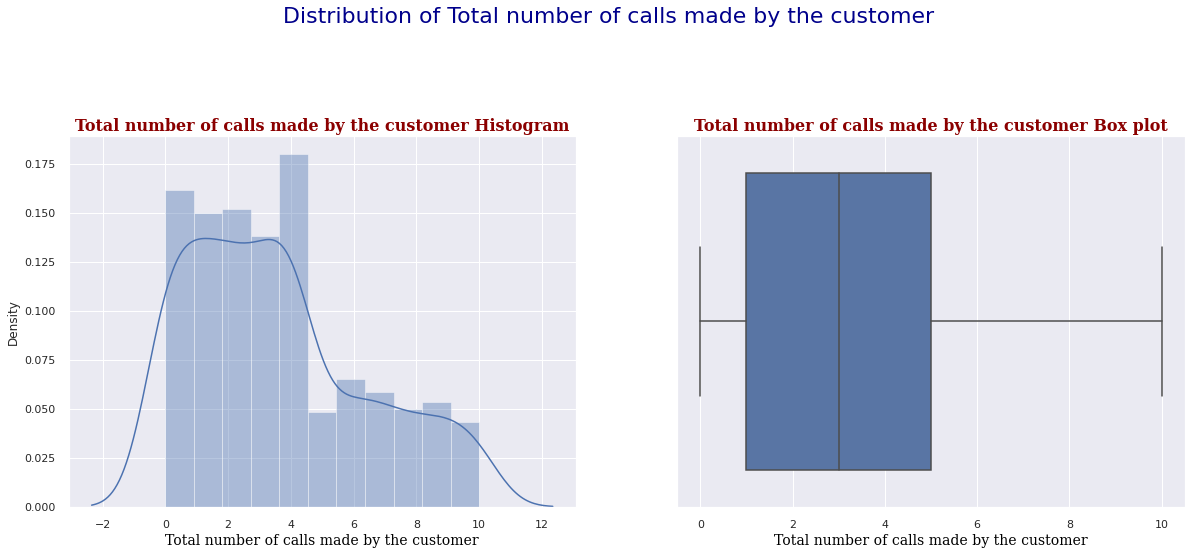

In [23]:
plt.figure(figsize=[20,15])
title_string = 'Distribution of Total number of calls made by the customer'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2) #Defining the grid spaconilnesvisitsam

ax0 = plt.subplot(grid[0, 0])
sns.distplot(x = data['Total_calls_made'])
ax0.set_xlabel('Total number of calls made by the customer', fontdict=lab_dict)
plt.title('Total number of calls made by the customer Histogram', fontdict = title_dict )

#boxplot

ax1 = plt.subplot(grid[0, 1])
sns.boxplot(x = 'Total_calls_made', data = data)
ax1.set_xlabel('Total number of calls made by the customer', fontdict=lab_dict)
plt.title('Total number of calls made by the customer Box plot', fontdict = title_dict )


plt.show();

*This attribute seems to be bi-modal. 50% of the customers made a call between 1 and 5* 


<a id="2"></a>
<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Multi-variate Analysis</h3>

#### Looking at the correlations

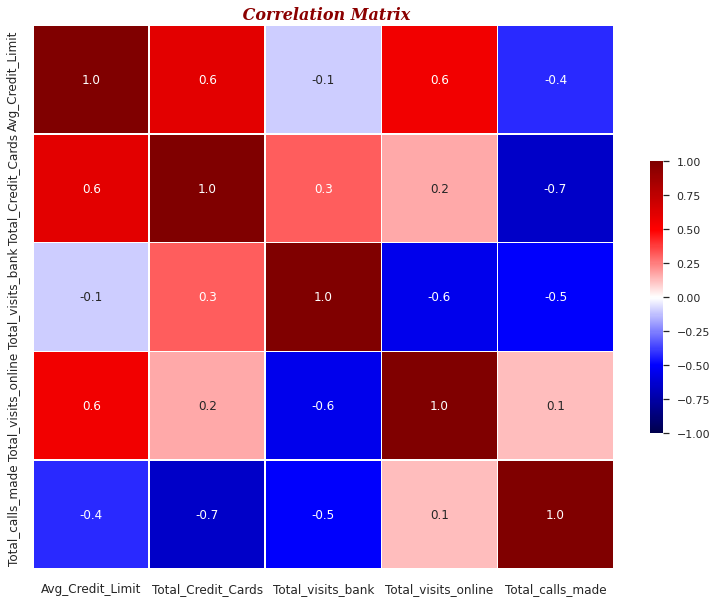

In [24]:
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()

# sorting correlations w.r.t Price  
corr = data[numeric_columns].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (13, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap = 'seismic', annot = True, fmt = ".1f", vmin = -1, vmax = 1, center = 0, square = False,
            linewidths = .7, cbar_kws = {"shrink": .5});
plt.title(' Correlation Matrix', fontstyle = 'italic', fontdict = title_dict)
plt.tick_params(axis='both', labelsize = 12)
plt.show()

`Total number of credit cards` is strongly negatively correlated with `Total number of calls made`

`Total number online visits` is negatively correlated with `Total number of bank visits`, which is obvious because cutomers resolving thier issues online do not need to visit the bank.

`Average credit limit is positivley correlated with `Total number of online visits` and `Total number of credit cards`

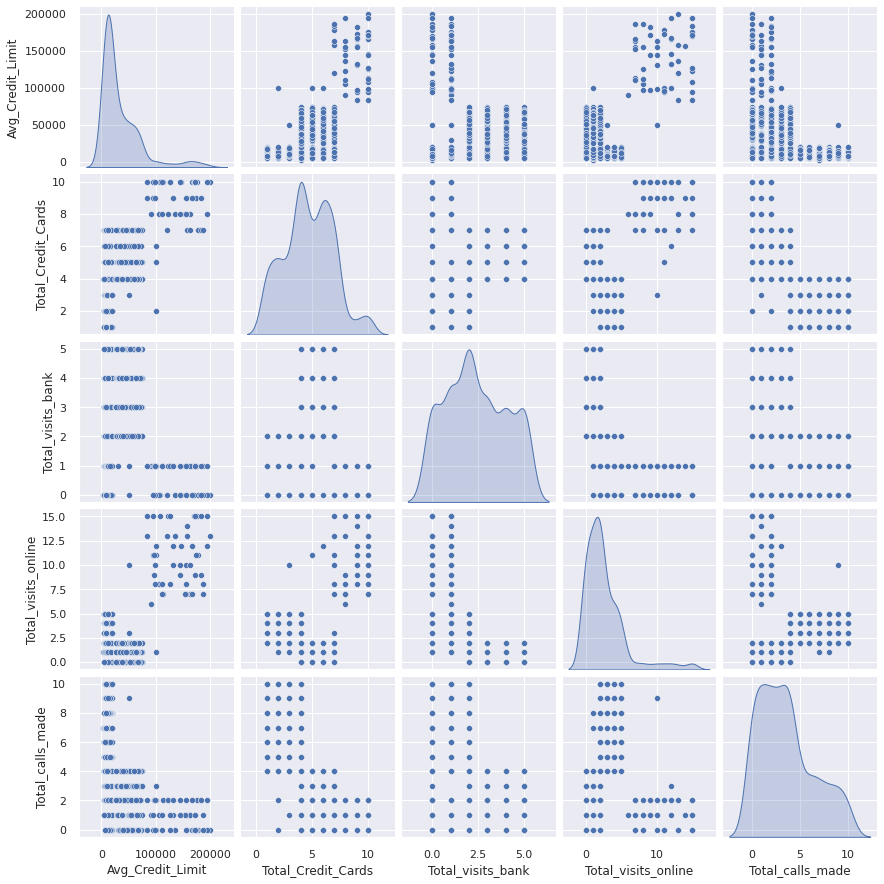

In [25]:
sns.pairplot(data,diag_kind="kde")

**Observations**
- Distribution of fees seems to be multimodal
- Distribution of Total number of online visits seems to be bimodal

##### Strong Negative correlation (-0.7 and -0.6)

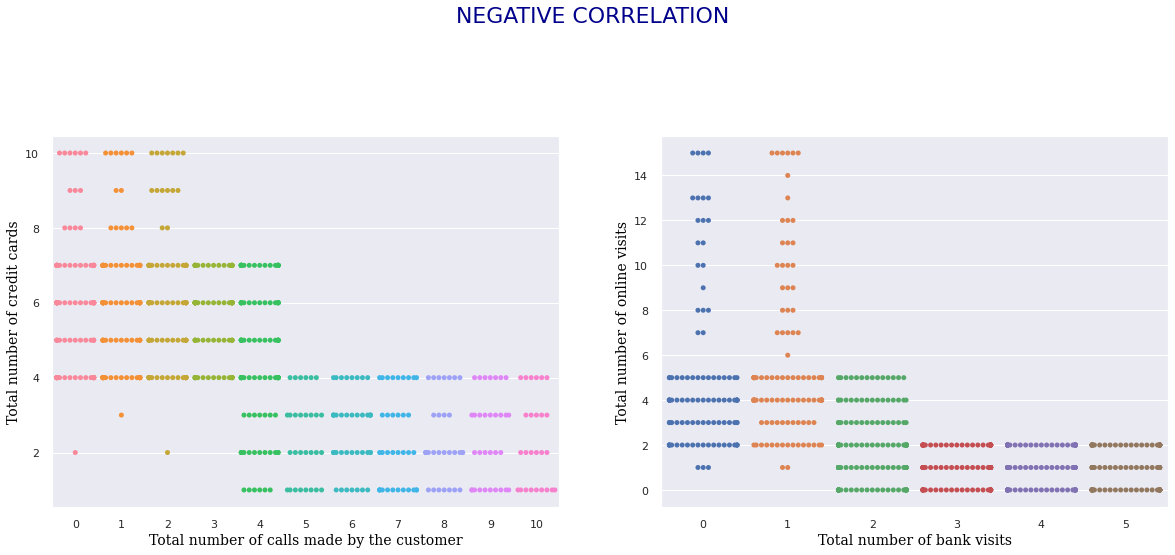

In [26]:

plt.figure(figsize=[20,15])
title_string = 'NEGATIVE CORRELATION'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2) #Defining the grid spaconilnesvisitsam

ax0 = plt.subplot(grid[0, 0])
sns.swarmplot(x = 'Total_calls_made', y = 'Total_Credit_Cards', data = data)
ax0.set_xlabel('Total number of calls made by the customer', fontdict=lab_dict)
ax0.set_ylabel('Total number of credit cards', fontdict=lab_dict)



ax1 = plt.subplot(grid[0, 1])
sns.swarmplot(y = 'Total_visits_online', x ='Total_visits_bank',  data = data)
ax1.set_ylabel('Total number of online visits', fontdict=lab_dict)
ax1.set_xlabel('Total number of bank visits', fontdict=lab_dict)

plt.show();



*It is evident from the above plots that :-
    
    *The higher the credit limit, less support calls are made by the customer*
    
    *As the number increases for online visits, a decline can be seen for the number of bank visits.
    
    
**It can be assumned that customers with less credit limit requires more support service from the bank. Also, we can see that there could be 3 possible clusters for customer segmentation.**

#### POSITIVE CORRELATION (0.6)

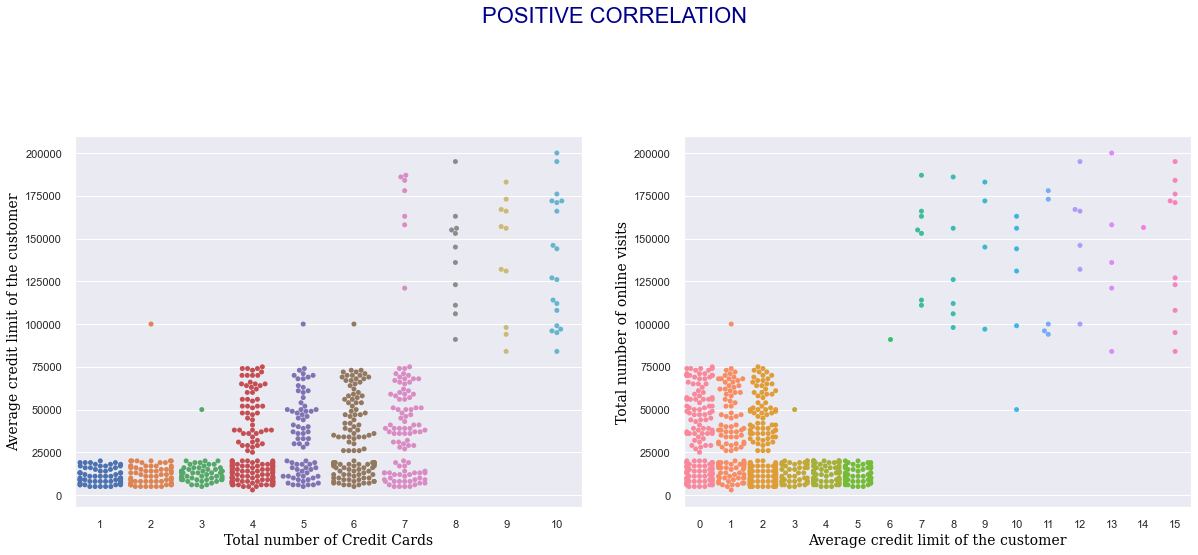

In [ ]:
plt.figure(figsize=[20,15])
title_string = 'POSITIVE CORRELATION'
plt.suptitle(title_string, y=1, fontsize=22, color = 'darkblue')
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2) #Defining the grid spaconilnesvisitsam

ax0 = plt.subplot(grid[0, 0])
sns.swarmplot(x = 'Total_Credit_Cards', y = 'Avg_Credit_Limit', data = data)
ax0.set_xlabel('Total number of Credit Cards', fontdict=lab_dict)
ax0.set_ylabel('Average credit limit of the customer', fontdict=lab_dict)


ax1 = plt.subplot(grid[0, 1])
sns.swarmplot(x = 'Total_visits_online', y ='Avg_Credit_Limit',  data = data)
ax1.set_ylabel('Total number of online visits', fontdict=lab_dict)
ax1.set_xlabel('Average credit limit of the customer', fontdict=lab_dict)



plt.show()



**It is obvious that customers with more number of credit cards will have a higher average credit limit**

**Also, customers with higher credit limit prefers to visit bank online rather than being physically present there**


In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)



x = data.Total_visits_bank
y = data.Total_visits_online
z = data.Total_calls_made


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
# plt.show()

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

<a id="2"></a>
<h1 style="background-color:blue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Clustering</h1>


<a id="2"></a>

<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">K-Means Clusterig</h3>

In [27]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)   

In [28]:
#Creating a dataframe from the scaled data above
subset_scaled_df = pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9431029376988642
Number of Clusters: 7 	Average Distortion: 0.9106448906676009
Number of Clusters: 8 	Average Distortion: 0.8920004110160061
CPU times: user 752 ms, sys: 128 ms, total: 880 ms
Wall time: 531 ms


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

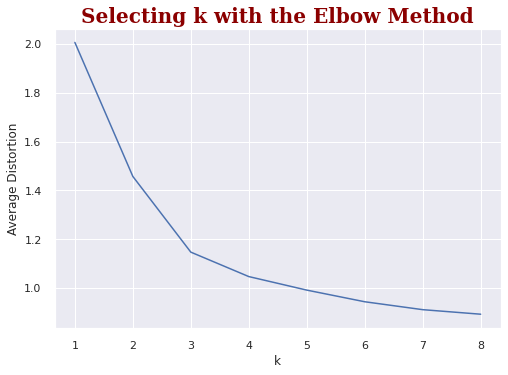

In [29]:
%%time

# Average Distortion 
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
    #distortion = model.inertia_ ## WCSS - variance  
    
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20, fontdict = title_dict)

Number of Clusters: 1 	Variance: 3300.000000000001
Number of Clusters: 2 	Variance: 2040.9898164784945
Number of Clusters: 3 	Variance: 933.0437490000536
Number of Clusters: 4 	Variance: 780.7736895551766
Number of Clusters: 5 	Variance: 704.600065099396
Number of Clusters: 6 	Variance: 642.2763517120097
Number of Clusters: 7 	Variance: 600.0981867200583
Number of Clusters: 8 	Variance: 567.3131364805067
CPU times: user 573 ms, sys: 7.03 ms, total: 580 ms
Wall time: 310 ms


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

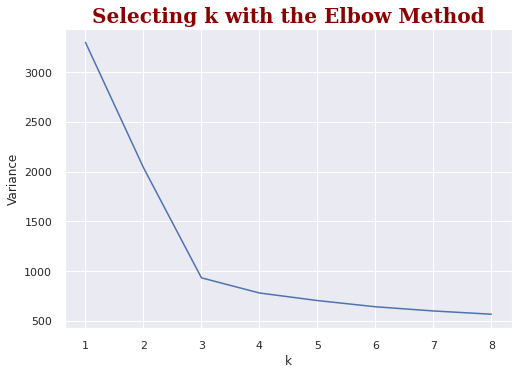

In [30]:
%%time

# Variance 
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = model.inertia_ ## WCSS - variance  
    
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tVariance:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Variance')
plt.title('Selecting k with the Elbow Method', fontsize=20, fontdict= title_dict) 

The appropriate value of k from elbow curve seems to be 3

### Lets us check silhoutte score

In [31]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.33191408988620896)
For n_clusters = 6, silhouette score is 0.2559585329098069)
For n_clusters = 7, silhouette score is 0.24810225726359075)
For n_clusters = 8, silhouette score is 0.22668630811994148)
For n_clusters = 9, silhouette score is 0.2267255318836596)


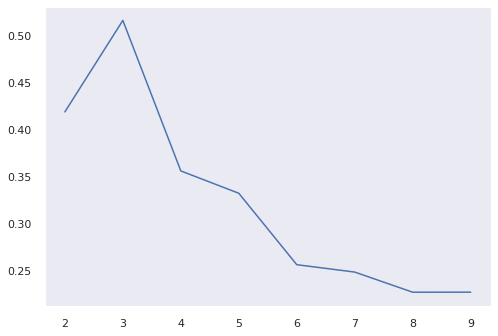

In [32]:
plt.plot(cluster_list,sil_score)
plt.grid()

From silhouette score, it seems that 3 is good value of k

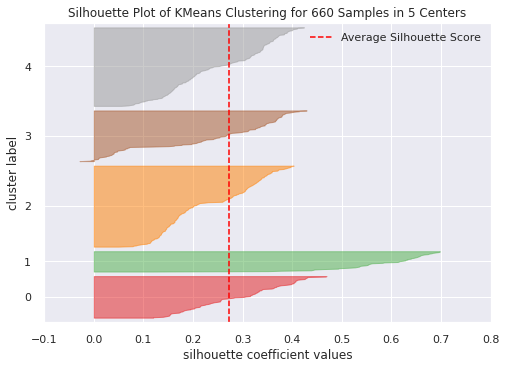

In [33]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

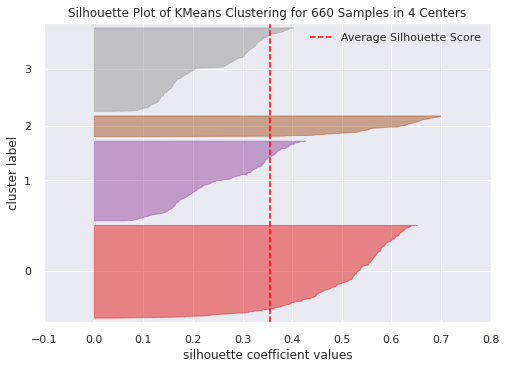

In [34]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

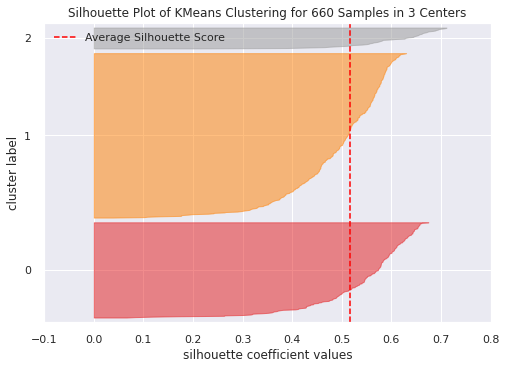

In [35]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

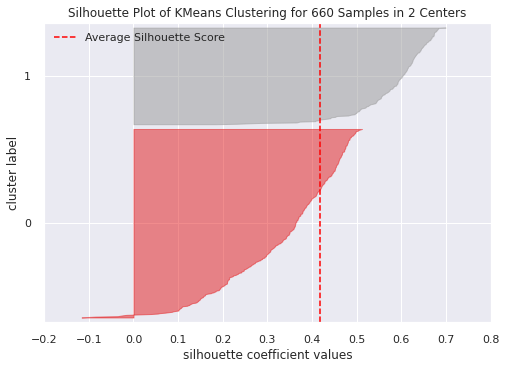

In [36]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

### Let us take 3 as appropriate no. of clusters as silhoutte score is high enough and there is a sharp bend at 3 in elbow curve.

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [38]:
data['K_means_segments'] = kmeans.labels_

In [39]:
data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  K_means_segments  
0                      1                 0                 0  
1                     10                 9                 1  
2                      3                 4                 0  
3                      1                 4                 0  
4                     12                 3                 2  
..                   ...               ...               ...  
655                   10                 0                 2  
656                   13                 2                 2  
657                    9                 1                 2  
658                   15                 0                 2  
659                   12                 2                 2  

[660 rows x 6 columns]

In [40]:
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [41]:
subset_scaled_df

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            1.740187           -1.249225          -0.860451   
1            0.410293           -0.787585          -1.473731   
2            0.410293            1.058973          -0.860451   
3           -0.121665            0.135694          -0.860451   
4            1.740187            0.597334          -1.473731   
..                ...                 ...                ...   
655          1.713589            2.443892          -0.860451   
656          1.314621            2.443892          -0.860451   
657          2.937092            1.520613          -0.860451   
658          3.655235            2.443892          -0.860451   
659          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  K_means_segments  
0              -0.547490         -1.251537                 0  
1               2.520519          1.891859                 1  
2               0.134290          0.145528                 0  
3              -0.547490          0.145528                 0  
4               3.202298         -0.203739                 2  
..                   ...               ...               ...  
655             2.520519         -1.251537                 2  
656             3.543188         -0.553005                 2  
657             2.179629         -0.902271                 2  
658             4.224968         -1.251537                 2  
659             3.202298         -0.553005                 2  

[660 rows x 6 columns]

In [42]:
cluster_profile = data.groupby('K_means_segments').mean()
cluster_profile1 = subset_scaled_df.groupby('K_means_segments').mean()

In [43]:
cluster_profile
#print(cluster_profile1)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
K_means_segments                                                            
0                     33782.383420            5.515544           3.489637   
1                     12174.107143            2.410714           0.933036   
2                    141040.000000            8.740000           0.600000   

                  Total_visits_online  Total_calls_made  
K_means_segments                                         
0                            0.981865          2.000000  
1                            3.553571          6.870536  
2                           10.900000          1.080000

In [44]:
cluster_profile['count_in_each_segment'] = data.groupby('K_means_segments')['Total_calls_made'].count().values
cluster_profile1['count_in_each_segment'] = subset_scaled_df.groupby('K_means_segments')['Total_calls_made'].count().values

In [45]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

In [46]:
cluster_profile1.style.highlight_max(color = 'pink', axis = 0)

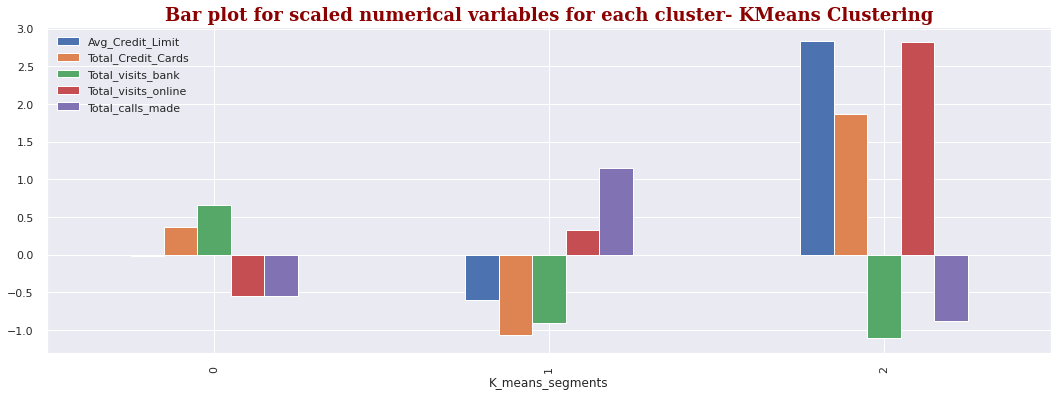

In [47]:

subset_scaled_df.groupby('K_means_segments').mean().plot.bar(figsize=(18,6))
plt.title('Bar plot for scaled numerical variables for each cluster- KMeans Clustering', fontdict = title_dict, fontsize = 18)
plt.show()


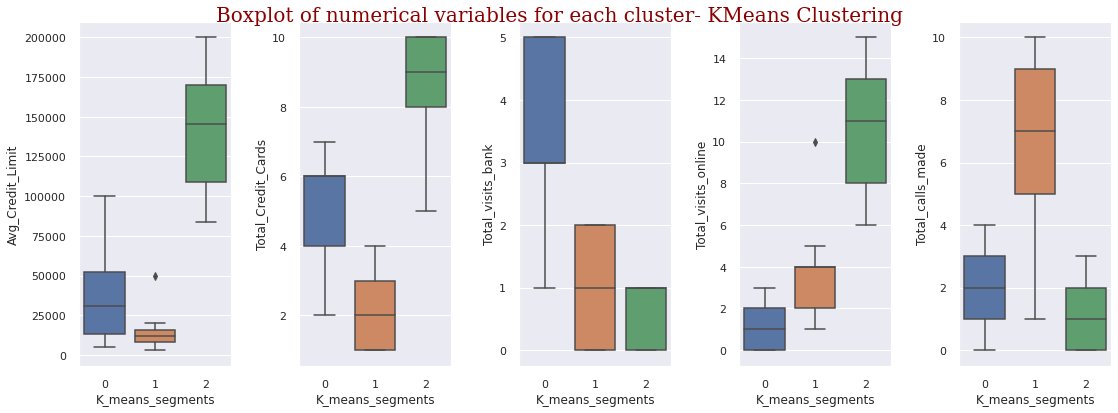

In [48]:
all_col = data.iloc[:,0:5].columns.tolist()
fig, axes = plt.subplots(1,5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster- KMeans Clustering', fontdict = title_dict, fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data[all_col[counter]],x=data['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Insights** 

**Cluster 0:**

*This group is about 58.5% of the total customer base*
    
    * Average Credit Limit is between Rs. 5000 and Rs. 10,000, which is a medium range
   
    * Customers have total number of credit cards between 2 and 7. 50% of the customers have total number of credit cards between 4 and 6, which is a medium range according to the boxplots
   
    * Highest number of bank visits can be seen for this cluster. 50% of the customers visited bank 3 to 5 times.
   
    * Lowest number of online visit customers. 50% of the customers visited the bank via online 0 to 2 times.
   
    * 50% of the customers made support calls between 1 and 3, which is a medium range.
   

**Cluster 1:**

*This group is about 33.9% of the total customer base*

    * Customers in this cluster have the lowest average credit limit, ranging between Rs. 8000 and Rs. 16,000
    
    * Customers with lowest number of credit cards are grouped in this cluster, ranging between 1 and 4
    
    * Number of times customers visited the bank was between 0 and 2, which can be called a medium range
    
    * Number of times customers visited the bank online was between 1 and 5. An extreme values is also seen, where the customer visited the bank online 10 times.
    
    * Highest number of support calls made by the customers are in this cluster. 75% of the customers had made support calls atmost 9 times.
    
    
**Cluster 2:**

*This group is about 7.6% of the total customer base*

    * Customers with maximum average credit limit are grouped in this cluster, ranging between Rs. 85,000 and Rs. 170,000
    
    * Customers with maximum number of credit cards are grouped in this cluster, which is obvious because their is a positive correlation between average credit limit and total number of credit cards. The range is between 5 and 10.
    
    * Lowest number of total bank visits, which is again obivious as these two attributes have a negative correlation. The range is between 0 and 1.
    
    * Customers with maximum number of online visits are grouped in this cluster, ranging between 6 and 15.
    
    * Lowest number of support calls made by the customers are in this cluster, ranging between 0 and 3

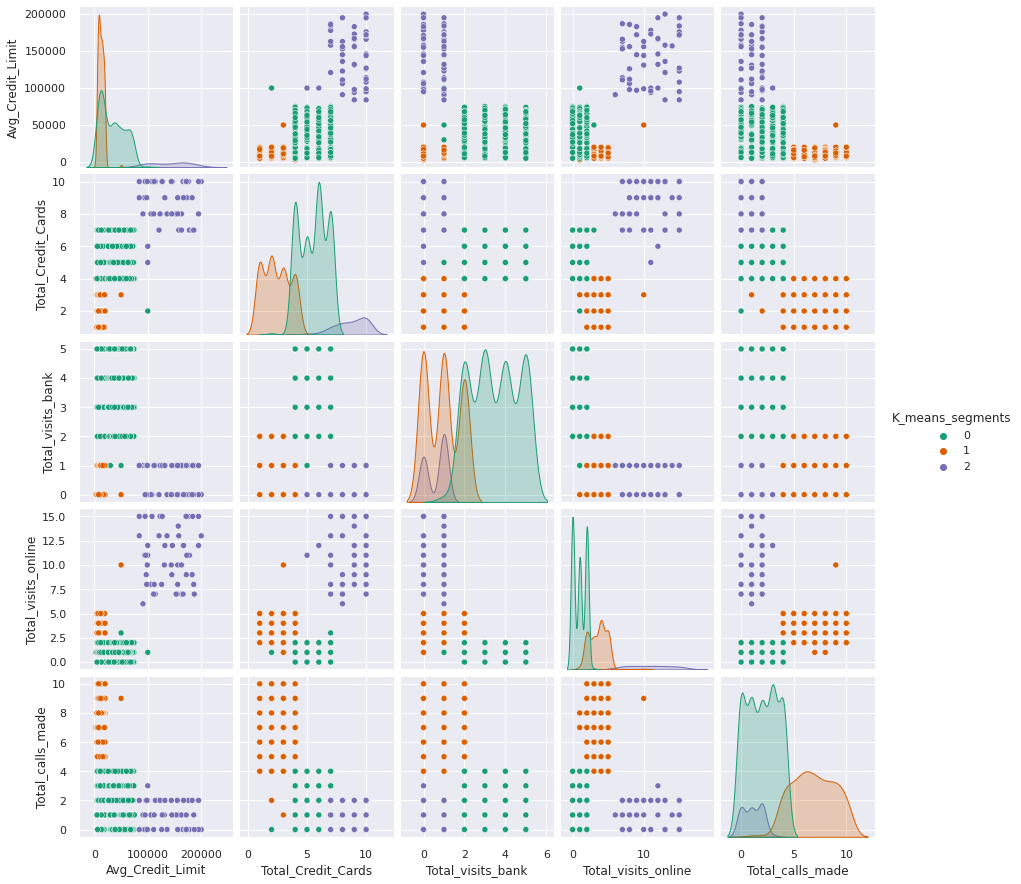

In [49]:
sns.pairplot(data, hue ='K_means_segments',  palette= 'Dark2', diag_kind='kde')

**The clusters are segregated well without any overlaps**

<a id="2"></a>

<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">K-Means Clusterig using PCA</h3>

In [50]:
subset_scaled_df1 = subset_scaled_df.copy() #copying the scaled data ''

In [51]:
subset_scaled_df1.drop(['K_means_segments'], axis =1, inplace = True)

In [52]:
subset_scaled_df1.shape

(660, 5)

In [53]:
pca = PCA()
pca=pca.fit(subset_scaled_df1)

In [54]:
#Lets check if we will take 5 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [55]:
# Show variance explained by individual components
pca.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

In [56]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.title('Explained Variances by Components', fontsize=20, fontdict = title_dict)
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

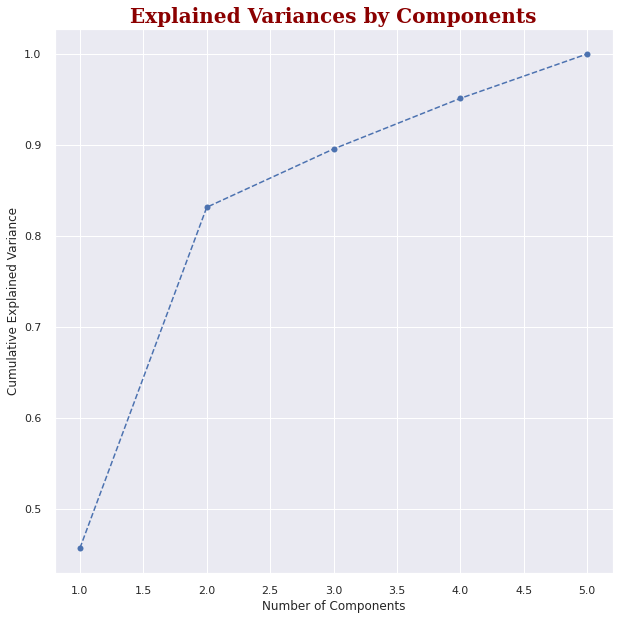

In [57]:
# visulaize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components", fontsize = 20, fontdict = title_dict)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

for 90% variance , the number of components should be 3

### Dimensionality Reduction

#### Now 3 dimensions seems very reasonable. With 3 variables we can explain over 90% of the variation in the original data!

In [58]:
pca = PCA(n_components = 3) 
pca.fit(subset_scaled_df1)

PCA(n_components=3)

In [59]:
pca.explained_variance_

array([2.29029906, 1.87416377, 0.3205531 ])

Text(0, 0.5, 'Cumulative Explained Variance')

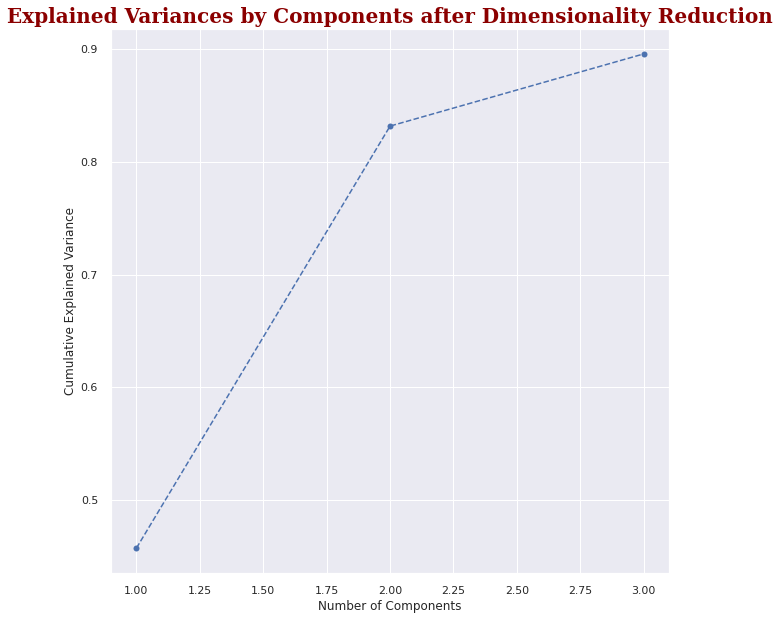

In [60]:
plt.figure(figsize = (10,10))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components after Dimensionality Reduction", fontsize = 20, fontdict = title_dict)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [61]:
subset_pca = pca.transform(subset_scaled_df1)
subset_pca_pairplot = pd.DataFrame(subset_pca, columns=['PC_' +str(i) for i in range(3)])


In [62]:
subset_pca

array([[ 0.50129079,  0.52482909,  1.89586173],
       [-1.45956008,  3.10558756, -0.9068019 ],
       [ 0.52579466,  0.82397914,  0.0890302 ],
       ...,
       [ 2.85144378,  2.98308097,  0.0448878 ],
       [ 4.17825796,  4.58293019, -0.60533647],
       [ 3.16042563,  4.35101851, -0.25437735]])

In [63]:
%%time
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_pca)
    prediction = model.predict(subset_pca)
    #distortion=sum(np.min(cdist(subset_pca, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
    distortion = model.inertia_ ## WCSS - variance  
    
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\t Variance:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Variance')
plt.title('Selecting k with the Elbow Method', fontsize=20, fontdict = title_dict )

Number of Clusters: 1 	 Variance: 2955.625498927224
Number of Clusters: 2 	 Variance: 1697.489636450195
Number of Clusters: 3 	 Variance: 591.5785451491529
Number of Clusters: 4 	 Variance: 466.6692230384816
Number of Clusters: 5 	 Variance: 398.64865705983186
Number of Clusters: 6 	 Variance: 356.66659972304467
Number of Clusters: 7 	 Variance: 326.11752373381603
Number of Clusters: 8 	 Variance: 296.412802337935
CPU times: user 539 ms, sys: 1.92 ms, total: 541 ms
Wall time: 289 ms


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

The appropriate value of k from elbow curve seems to be 3

### Lets us check silhoutte score for reduced data 

In [64]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_pca))
    
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_pca, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4898075342288726)
For n_clusters = 3, silhouette score is 0.6037083469533087)
For n_clusters = 4, silhouette score is 0.4250192948434483)
For n_clusters = 5, silhouette score is 0.3449878443689741)
For n_clusters = 6, silhouette score is 0.3221268097555398)
For n_clusters = 7, silhouette score is 0.30829822083480735)
For n_clusters = 8, silhouette score is 0.2852717102046456)
For n_clusters = 9, silhouette score is 0.2719538883605845)


In [65]:
plt.plot(cluster_list,sil_score)
plt.title('Silhouette Score for each value of k', fontsize=20, fontdict = title_dict)
plt.grid()

We get the best silhouette score for k =3

In [66]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_pca)

KMeans(n_clusters=3, random_state=0)

In [68]:
subset_pca_pairplot['Cluster']=kmeans.labels_ #Add cluster column in the data frame

In [69]:

subset_pca_pairplot.head()

PC_0      PC_1      PC_2  Cluster
0  0.501291  0.524829  1.895862        0
1 -1.459560  3.105588 -0.906802        1
2  0.525795  0.823979  0.089030        0
3 -0.362294  0.128123  0.558215        0
4  1.266228  3.668708 -0.099999        2

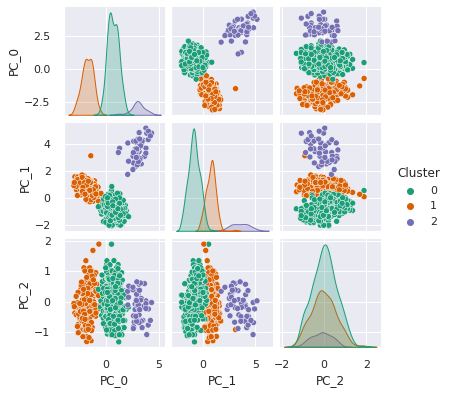

In [70]:
#pairwise relationship of components on the data
sns.pairplot(subset_pca_pairplot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

**PC_0 and PC_1 are able to identify clusters** 

In [71]:
plt.figure(figsize=(7,7))
plt.scatter(subset_pca[:,0],subset_pca[:,1],c=kmeans.labels_,cmap='Dark2',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

Text(0, 0.5, 'PC_1')

**The clusters are segregated well**

In [72]:
data2 = data.copy()
data2.drop(['K_means_segments'], axis =1, inplace= True)
data2['K_means_segments_pca'] = kmeans.labels_

In [73]:
cluster_profile_pca = data2.groupby('K_means_segments_pca').mean()

In [74]:
cluster_profile_pca['count_in_each_segment'] = data2.groupby('K_means_segments_pca')['Avg_Credit_Limit'].count().values

In [75]:
cluster_profile_pca.style.highlight_max(color = 'red', axis = 0)

In [76]:
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

In [77]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster - KMeans Clustering - PCA', fontdict = title_dict, fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data2[all_col[counter]],x=data2['K_means_segments_pca'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**If we compare the clusters formed using PCA and without using PCA, it is evident from the boxplots that overall composition of the clusters are the same. Only, the properties of cluster 0 and cluster 1 have interchnaged.**

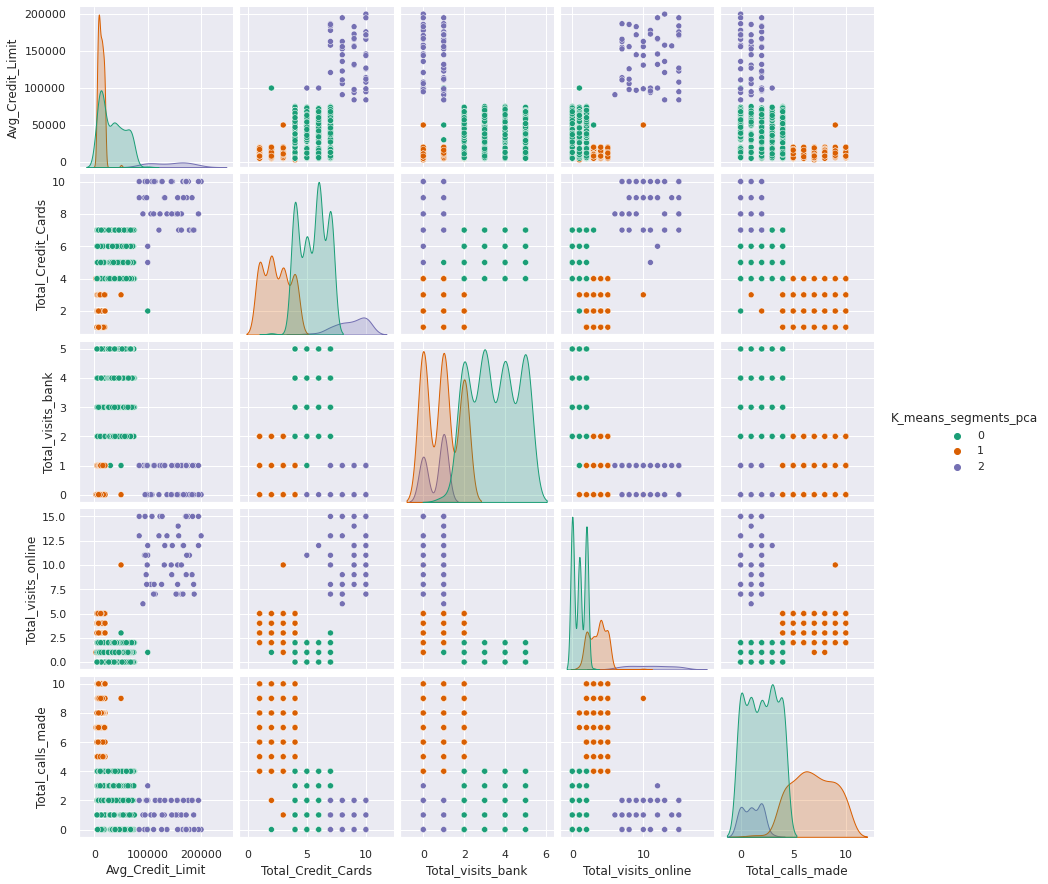

In [78]:
sns.pairplot(data2, hue = 'K_means_segments_pca',palette= 'Dark2', diag_kind='kde')


<a id="2"></a>

<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Hierarchical Clustering</h3>

In [79]:
#Creating a dataframe from the scaled data for Hierarchical Clustering
subset_scaled_df_h = pd.DataFrame(subset_scaled,columns=subset.columns)

In [80]:
%%time

# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df_h, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_h))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', (0.80, 0.80), xycoords='axes fraction')
#     compare.append([method, coph_corr])

CPU times: user 4.14 s, sys: 607 ms, total: 4.74 s
Wall time: 4.15 s


In [81]:
sil_score = []
cluster_list = list(range(2,12))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df_h))
    
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df_h, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.417704147620949)
For n_clusters = 3, silhouette score is 0.5147639589977819)
For n_clusters = 4, silhouette score is 0.3480822581261928)
For n_clusters = 5, silhouette score is 0.2569177732675831)
For n_clusters = 6, silhouette score is 0.22677849725544041)
For n_clusters = 7, silhouette score is 0.2162968685485734)
For n_clusters = 8, silhouette score is 0.2186949061936046)
For n_clusters = 9, silhouette score is 0.19527074669093417)
For n_clusters = 10, silhouette score is 0.1931418958857584)
For n_clusters = 11, silhouette score is 0.17458363480652647)


**According to the silhouette score, 3 is an appropriate value for the number of clusters. But, still lets look at the diiference between 3 and 4 clusters.**

In [82]:
subset_scaled_df_h3 = subset_scaled_df_h.copy()
subset_scaled_df_h4 = subset_scaled_df_h.copy()

#Trying with K value as 3
HCmodel1 = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel1.fit(subset_scaled_df_h3)
subset_scaled_df_h3['HC_Clusters'] = HCmodel1.labels_


#Trying with K value as 4
HCmodel2 = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel2.fit(subset_scaled_df_h4)
subset_scaled_df_h4['HC_Clusters'] = HCmodel2.labels_

In [83]:
data_h_3 = data.copy()
data_h_4 = data.copy()
data_h_3.drop(['K_means_segments'], axis =1, inplace= True)
data_h_4.drop(['K_means_segments'], axis =1, inplace= True)
data_h_3['HC_Clusters'] = HCmodel1.labels_
data_h_4['HC_Clusters'] = HCmodel2.labels_

In [84]:
cluster_profile_h3 = data_h_3.groupby('HC_Clusters').mean()
cluster_profile_h4 = data_h_4.groupby('HC_Clusters').mean()

In [85]:
cluster_profile_h3['count_in_each_segments'] = data_h_3.groupby('HC_Clusters')['Total_calls_made'].count().values
cluster_profile_h4['count_in_each_segments'] = data_h_4.groupby('HC_Clusters')['Total_calls_made'].count().values

In [86]:
# lets display cluster profile
cluster_profile_h3.style.highlight_max(color = 'green', axis = 0)

In [87]:
# lets display cluster profile
cluster_profile_h4.style.highlight_max(color = 'lightgreen', axis = 0)

In [88]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster - Hierarchical Clustering', fontdict = title_dict, fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_h_3[all_col[counter]],x=data_h_3['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

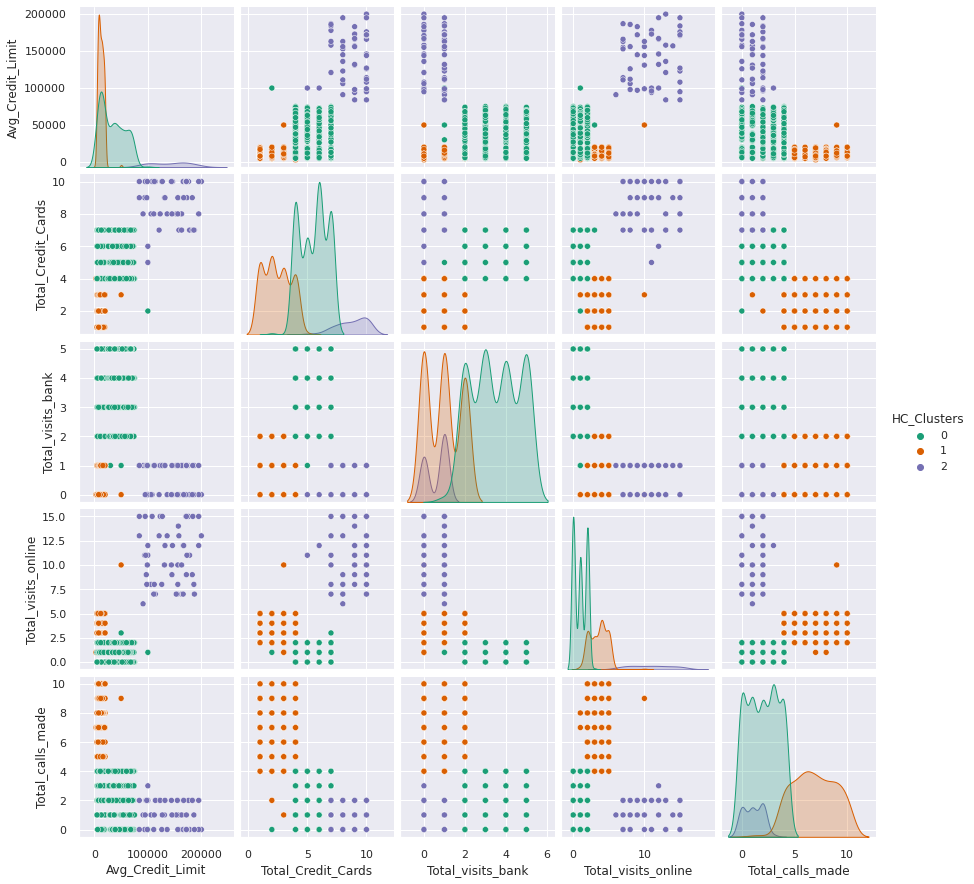

In [89]:
sns.pairplot(data_h_3, hue ='HC_Clusters',  palette= 'Dark2', diag_kind='kde')

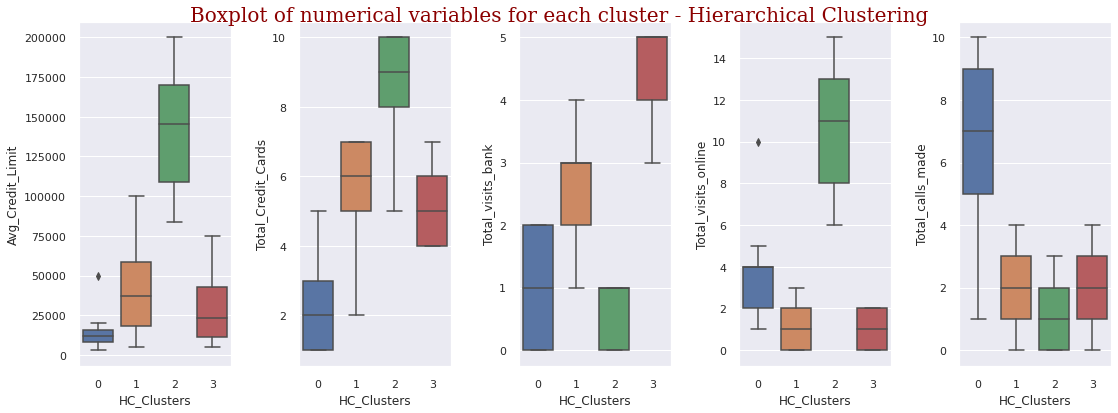

In [90]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster - Hierarchical Clustering', fontdict = title_dict, fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_h_4[all_col[counter]],x=data_h_4['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

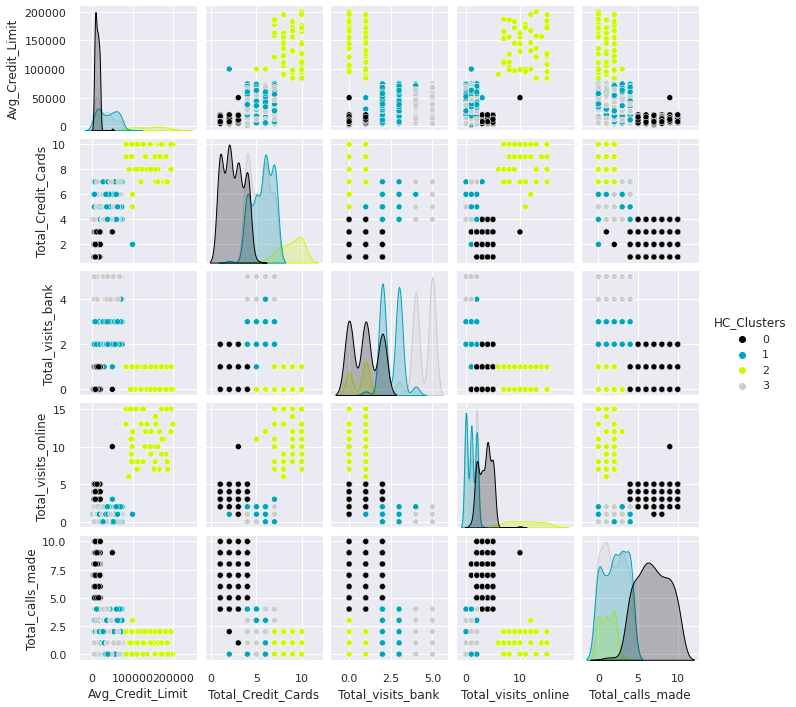

In [91]:
sns.pairplot(data_h_4, hue ='HC_Clusters',  palette= 'nipy_spectral', diag_kind='kde', size = 2.0)



<a id="2"></a>

<h1 style="background-color: yellow;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Hierarchical Clustering using PCA</h3>

In [92]:
subset_scaled_df_hpca = subset_scaled_df_h.copy()

In [93]:
pca_h= PCA()
pca_h.fit(subset_scaled_df_hpca)

PCA()

In [94]:
# Show variance explained by individual components
pca_h.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

Text(0, 0.5, 'Cumulative Explained Variance')

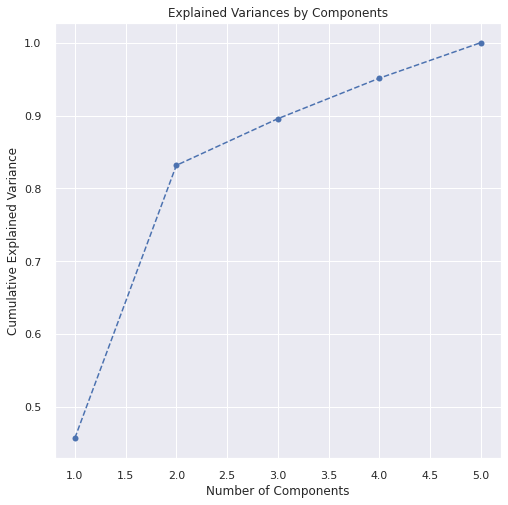

In [95]:
# visulaize the Explained Individual Components
plt.figure(figsize = (8,8))
plt.plot(range(1,6), pca_h.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

**For 90% variance, the number of components should be 3**

In [96]:
pca_h = PCA(.9,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
pca_h.fit(subset_scaled_df_hpca)

PCA(n_components=0.9, svd_solver='full')

In [97]:
pca_h.explained_variance_

array([2.29029906, 1.87416377, 0.3205531 , 0.27826563])

Text(0, 0.5, 'Cumulative Explained Variance')

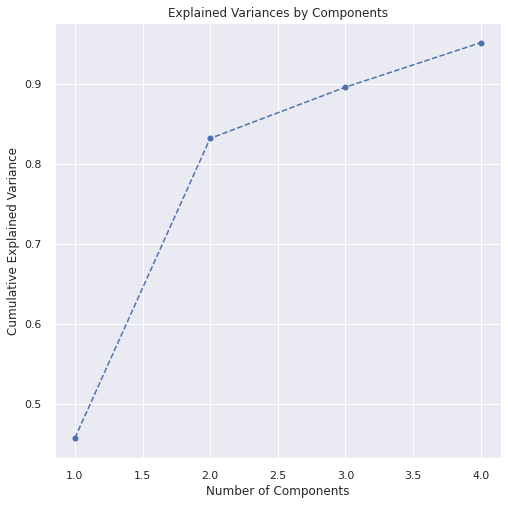

In [98]:
plt.figure(figsize = (8,8))
plt.plot(range(1,5), pca_h.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [99]:
subset_pca_h = pca_h.transform(subset_scaled_df_hpca)
subset_pca_h = pd.DataFrame(subset_pca_h, columns=['PC_' +str(i) for i in range(4)])

CPU times: user 4.05 s, sys: 587 ms, total: 4.63 s
Wall time: 4.08 s


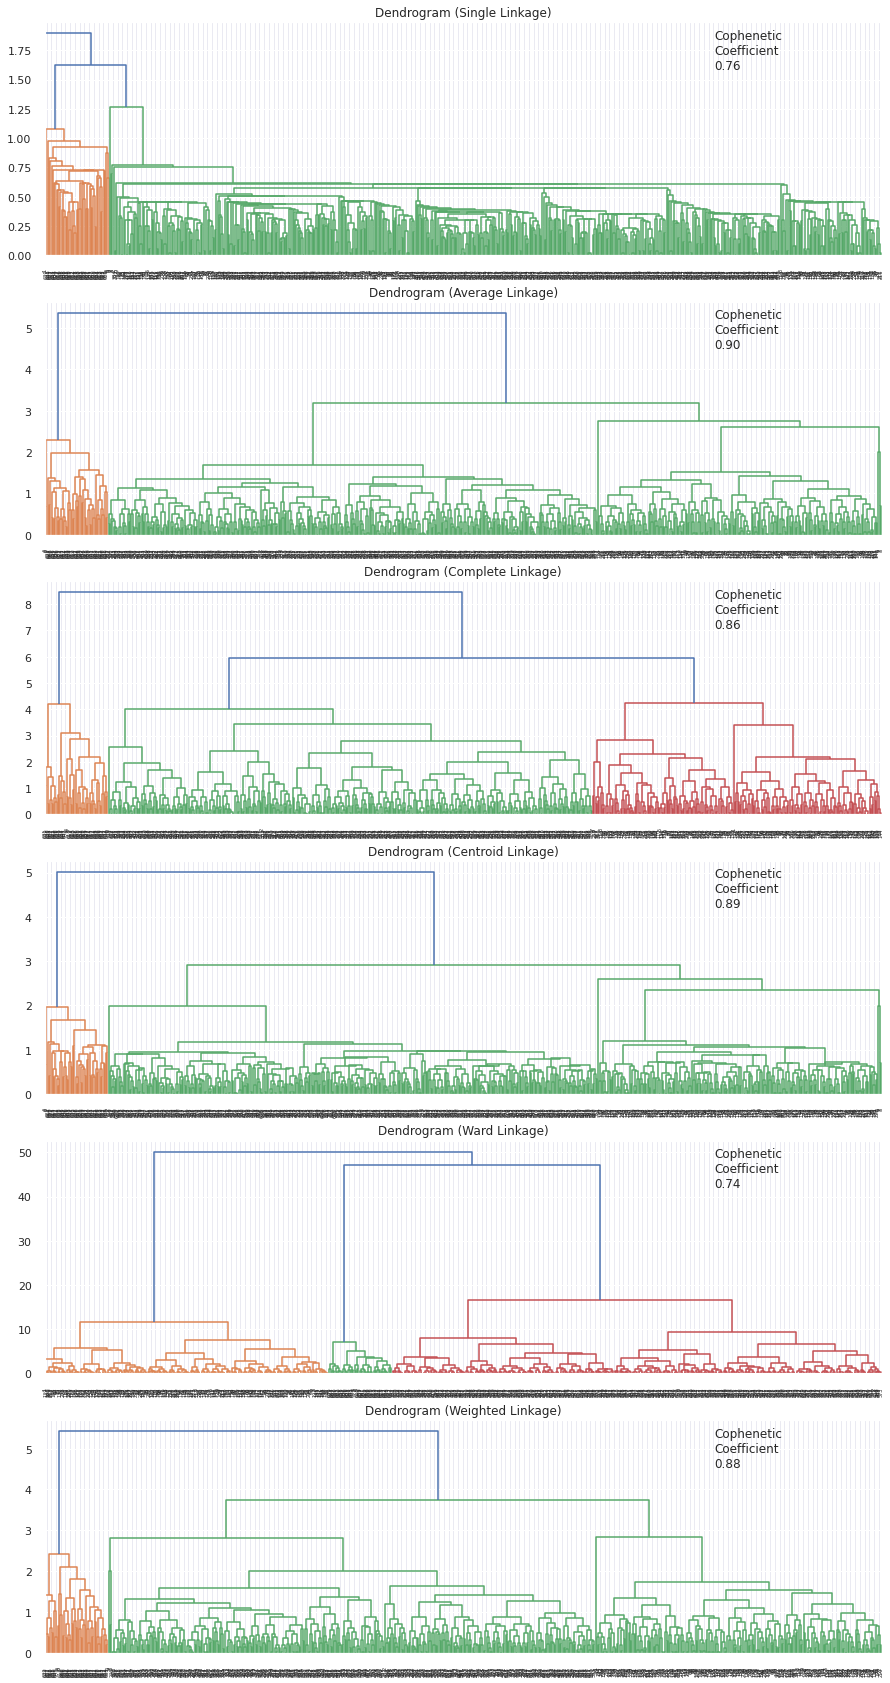

In [100]:
%%time
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_pca_h, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_hpca))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

In [101]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
hc_labels1 = hc1.fit_predict(subset_pca_h)
hc_labels2 = hc2.fit_predict(subset_pca_h)

In [102]:
subset_pca_h['PCA_HC_Cluster1']=hc_labels1 #Add cluster column in the data frame
subset_pca_h['PCA_HC_Cluster2']=hc_labels2 #Add cluster column in the data frame
subset_pca_h.head()

PC_0      PC_1      PC_2      PC_3  PCA_HC_Cluster1  PCA_HC_Cluster2
0  0.501291  0.524829  1.895862  1.200582                0                1
1 -1.459560  3.105588 -0.906802  0.411052                1                0
2  0.525795  0.823979  0.089030 -1.033119                0                1
3 -0.362294  0.128123  0.558215 -0.729885                1                0
4  1.266228  3.668708 -0.099999  0.505571                2                2

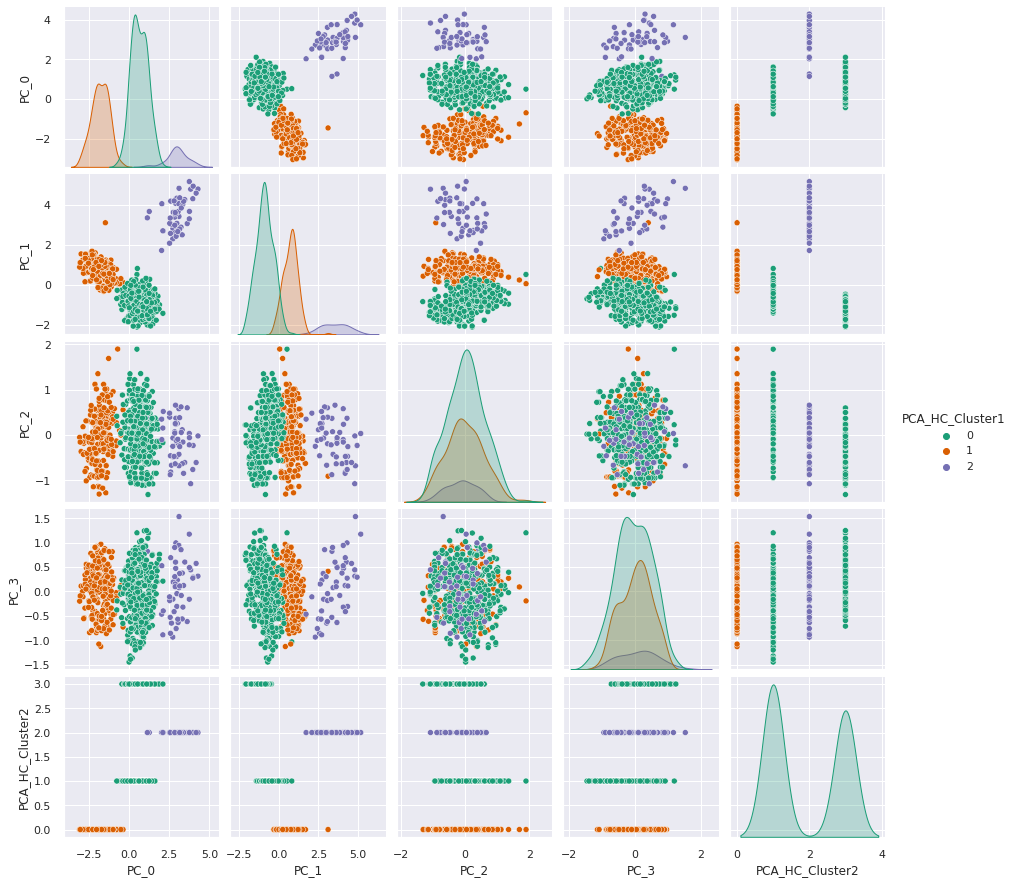

In [103]:
sns.pairplot(subset_pca_h, hue = 'PCA_HC_Cluster1',palette= 'Dark2', diag_kind='kde')

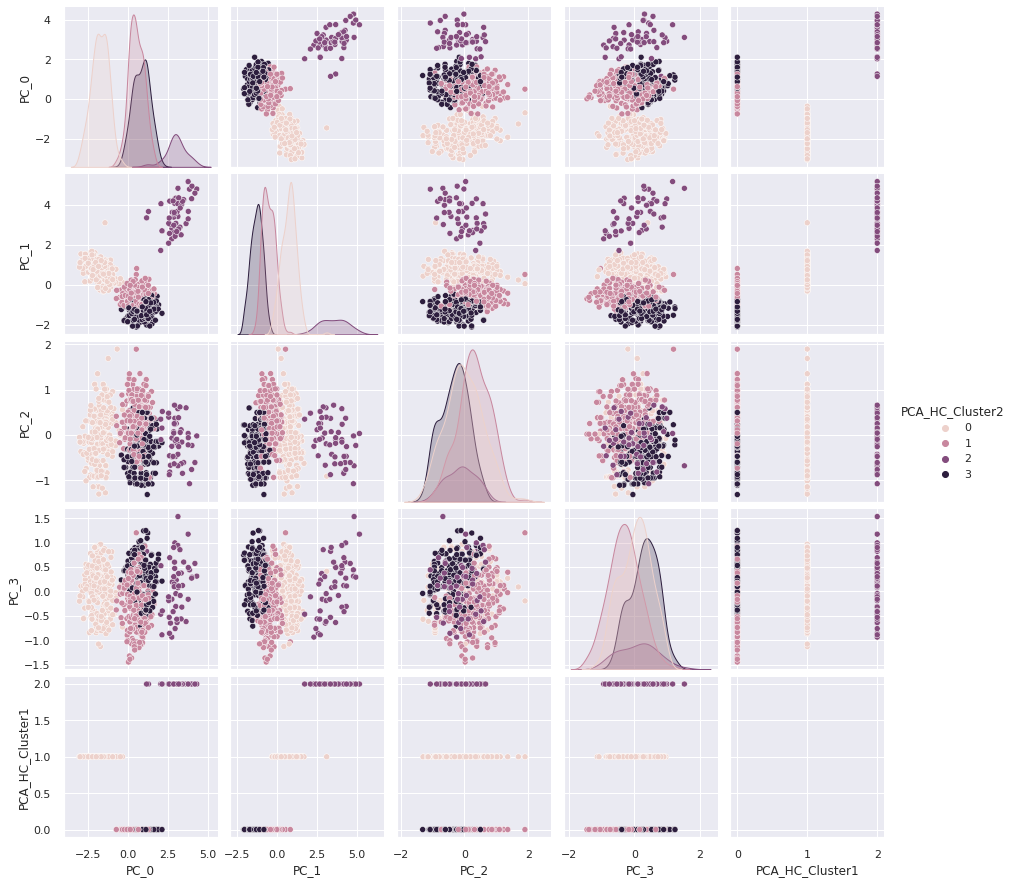

In [104]:
sns.pairplot(subset_pca_h, hue = 'PCA_HC_Cluster2', diag_kind='kde')

**PC_0 and PC_1 can provide good segregation of clusters, for k =3**

**k=4 doesn't provide much clear segregation of clusters**

Text(0, 0.5, 'PC_1')

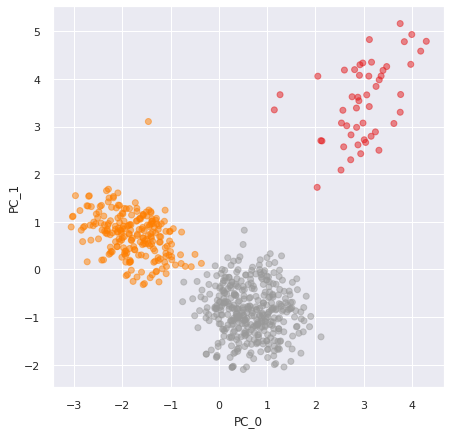

In [114]:
plt.figure(figsize=(7,7))
plt.scatter(x = 'PC_0', y ='PC_1', data = subset_pca_h, c =hc1.fit_predict(subset_pca_h), cmap='Set1_r',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

**Two out of three clusters are not segregated well**

*Good segregation, however there can be some overlapping between marron and green cluster.So, instead of 90% of variance will try for 85% of varaince*


In [115]:
pca_h85 = PCA(.85,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
pca_h85.fit(subset_scaled_df_hpca)

PCA(n_components=0.85, svd_solver='full')

In [116]:
pca_h85.explained_variance_

array([2.29029906, 1.87416377, 0.3205531 ])

In [117]:
plt.figure(figsize = (8,8))
plt.plot(range(1,4), pca_h85.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

Text(0, 0.5, 'Cumulative Explained Variance')

*We get 3 components with 89% of variance, which is good*

In [118]:
subset_pca_h85 = pca_h85.transform(subset_scaled_df_hpca)
subset_pca_h85 = pd.DataFrame(subset_pca_h85, columns=['PC_' +str(i) for i in range(3)])

In [119]:
%%time
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_pca_h85, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_hpca))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

CPU times: user 4.18 s, sys: 559 ms, total: 4.74 s
Wall time: 4.18 s


In [120]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

hc_labels11 = hc1.fit_predict(subset_pca_h85)


In [121]:
subset_pca_h85['PCA_HC_Cluster1'] =hc_labels11 #Add cluster column in the data frame

subset_pca_h85.head()

PC_0      PC_1      PC_2  PCA_HC_Cluster1
0  0.501291  0.524829  1.895862                1
1 -1.459560  3.105588 -0.906802                1
2  0.525795  0.823979  0.089030                0
3 -0.362294  0.128123  0.558215                0
4  1.266228  3.668708 -0.099999                2

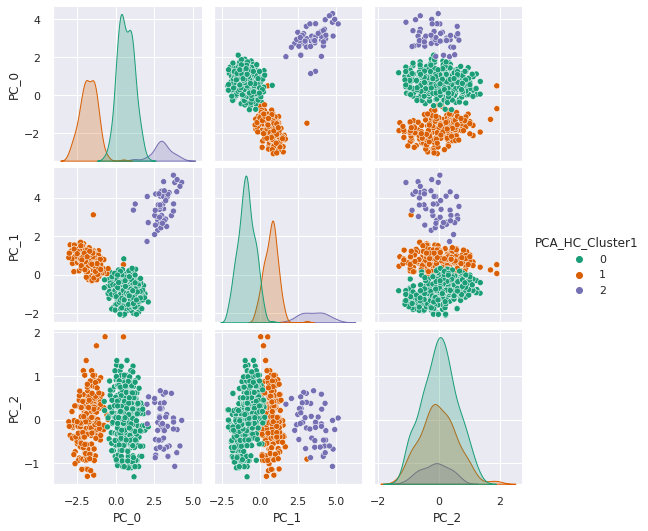

In [122]:
sns.pairplot(subset_pca_h85, hue = 'PCA_HC_Cluster1',palette= 'Dark2', diag_kind='kde')

In [125]:
plt.figure(figsize=(7,7))
plt.scatter(x = 'PC_0', y ='PC_1', data = subset_pca_h85, c =hc1.fit_predict(subset_pca_h85), cmap='Set3',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

Text(0, 0.5, 'PC_1')

*Did not find much difference by reducing the number of dimensions from 4 to 3.*

In [126]:
dff = data.copy()

In [127]:
dff.drop(['K_means_segments'], axis =1, inplace=True)

In [128]:
dff['PCA_HC_clusters'] = hc_labels11

In [129]:
cluster_profile_hpca = dff.groupby('PCA_HC_clusters').mean()
cluster_profile_hpca['count_in_each_segments'] = dff.groupby('PCA_HC_clusters')['Total_calls_made'].count().values

In [130]:
# lets display cluster profile
cluster_profile_hpca.style.highlight_max(color = 'lightgreen', axis = 0)